In [2]:
import numpy as np
from scipy.special import binom
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

- We consider 2 transcription factors called TF1 and TF2.
- Suppose that TF1 targets $N_1$ genes and TF2 targets $N_2$ genes among a set of $N$ differentially expressed genes. 
- Let $X$ denote the number of common genes that TF1 and TF2 target. 

It can be seen that under a null hypergeometric model,

\begin{equation}
    \mathbb{P}(X=n) = \frac{{N \choose n}{N-n \choose N_1-n}{N-N_1 \choose N_2-n}}{{N \choose N_1}{N \choose N_2}}\mathbb{1}\left[\max(0, N_1+N_2-N)\leq n\leq \min(N1, N_2)\right].
\end{equation}

Say that we observe that TF1 and TF2 target $n^\star$ common genes. In that case, the p-value under the hypergeometric model can be obtained as

\begin{equation}
    p = \sum_{n\geq n^\star} \mathbb{P}(X=n) = \sum_{n\geq n^\star}\frac{{N \choose n}{N-n \choose N_1-n}{N-N_1 \choose N_2-n}}{{N \choose N_1}{N \choose N_2}}\mathbb{1}\left[\max(0, N_1+N_2-N)\leq n\leq \min(N1, N_2)\right].
\end{equation}

Below, we provide some code to show that the proposed null distribution is valid and to compute the p-value. The code is run with low values of $N$. In case of numerical overflow due to high values of $N$, one fix would be to use log-binomial coefficients using the scipy.special.loggamma function.

In [3]:
# Probability there are n common balls between a draw of N1 balls and a draw of N2 balls among N distinct balls
def prob(n, N, N1, N2):
    if (n < np.max([0, N1+N2-N])):
        out = 0
    elif (n > np.min([N1, N2])):
        out = 0
    else:
        num = binom(N, n)*binom(N-n, N1-n)*binom(N-N1, N2-n)
        denom = binom(N, N1)*binom(N, N2)
        out = num/denom
    return(out)

Sum of all probabilities = 1.0


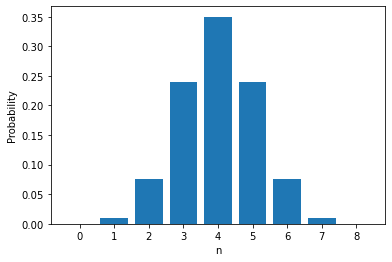

In [10]:
# Example to check that the proposed null distribution is a valid PMF
N = 20
N1 = 10
N2 = 8

# Let X denote the number of common balls between the two random draws.

# Compute Prob(X=n) for all n between 0 and N
n_range = np.arange(np.max([0, N1+N2-N]), np.min([N1, N2])+1)
all_probs = [prob(n, N, N1, N2) for n in n_range]
sum_all_probs = np.sum(all_probs)
print(f'Sum of all probabilities = {sum_all_probs}')

# Plot PMF of X
plt.figure()
plt.bar(x=n_range, height=all_probs)
plt.xticks(n_range)
plt.xlabel('n')
plt.ylabel('Probability')
plt.show()

In [4]:
# Example to compute the p-value
N = 10
N1 = 3
N2 = 4
n_star = 2
probs_above_n = [prob(n, N, N1, N2) for n in np.arange(n_star, np.min([N1, N2])+1)]
p_val = np.sum(probs_above_n)
print(f'p-value = {p_val}')

p-value = 0.3333333333333333


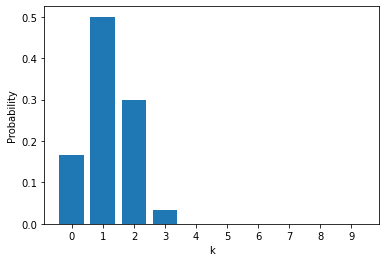

In [5]:
# hypergeometric distribution
M = 10 # total number of objects = number of DE genes
n = 3 # total number of type 1 objects = number of DE targets of TF1
N = 4 # number of draws wo replacement = number of DE targets of TF2
k_range = np.arange(0, 10)
all_probs = [hypergeom.pmf(k, M, n, N) for k in k_range]

# Plot PMF of X
plt.figure()
plt.bar(x=k_range, height=all_probs)
plt.xticks(k_range)
plt.xlabel('k')
plt.ylabel('Probability')
plt.show()

In [59]:
pval = hypergeom.sf(1, M, n, N)
print(f'p-value = {p_val}')

p-value = 0.3333333333333333


In [40]:
1 - (binom(3, 0)*binom(7,4)/binom(10,4) + binom(3, 1)*binom(7,3)/binom(10,4))

0.33333333333333337

In [38]:
probs = [binom(3, k)*binom(7,4-k)/binom(10,4) for k in range(2)]
1 - sum(probs)

0.33333333333333337

In [47]:
probs = [binom(19, k) * binom(429-19, 252-k) / binom(429, 252) for k in range(19)]
print(probs)
print(1 - sum(probs))

[2.7255365376736765e-08, 8.207464743633412e-07, 1.1587914284919069e-05, 0.00010196404909088914, 0.0006268900795958393, 0.0028613878479712444, 0.01005556827061643, 0.027842170847989685, 0.06163854088332651, 0.11007175231597964, 0.15921092745701554, 0.18653114577807492, 0.1762902201275054, 0.13322877634467584, 0.07933972810559034, 0.036383150846100276, 0.012389090158800973, 0.0029483952377927876, 0.0004374197480312221]
3.043598571772499e-05


In [52]:
probs = [hypergeom.pmf(k, 429, 19, 252) for k in range(19)]
print(probs)
print(1 - sum(probs))

[2.725536537671692e-08, 8.207464743627274e-07, 1.1587914284911007e-05, 0.00010196404909081293, 0.0006268900795953731, 0.00286138784796911, 0.010055568270609327, 0.02784217084796956, 0.061638540883281696, 0.11007175231590269, 0.15921092745690424, 0.18653114577793928, 0.17629022012737794, 0.13322877634458175, 0.07933972810553115, 0.036383150846073214, 0.01238909015879171, 0.002948395237790736, 0.0004374197480308951]
3.043598643581724e-05


In [53]:
hypergeom.sf(18, 429, 19, 252)

3.043598603603692e-05

In [54]:
1 - hypergeom.cdf(18, 429, 19, 252)

3.043598643581724e-05